<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python_advance/18_Matplotlib_Box_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Box Plots

Load data.

In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\DK\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_da_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_da_india = df_da_india.dropna(subset=['salary_year_avg'])

df_da_india['salary_year_avg'].sample(10)

217392     50400.0
462026    111175.0
431473     32400.0
638542    104500.0
396937    111175.0
293234    111175.0
422037     79200.0
483120    111175.0
380199    177283.0
277313    111175.0
Name: salary_year_avg, dtype: float64

<Axes: >

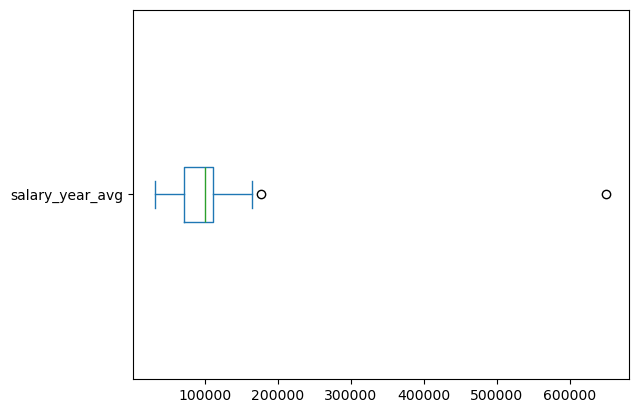

In [ ]:
df_da_india['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x25ea9c44cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ea9c44f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ea9c44b90>],
 'medians': [<matplotlib.lines.Line2D at 0x25ea9c451d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ea9c45310>],
 'means': []}

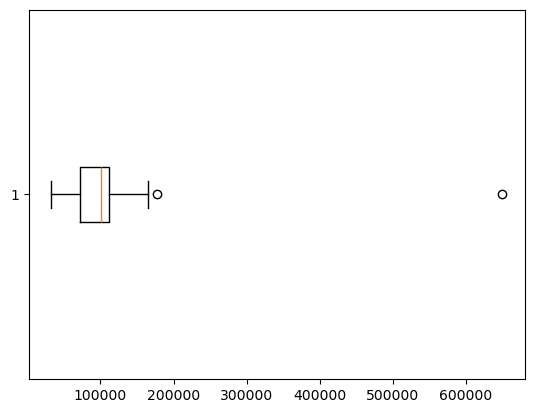

In [ ]:
plt.boxplot(df_da_india['salary_year_avg'], vert=False)

C:\Users\DK\AppData\Local\Temp\ipykernel_21516\2545816716.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


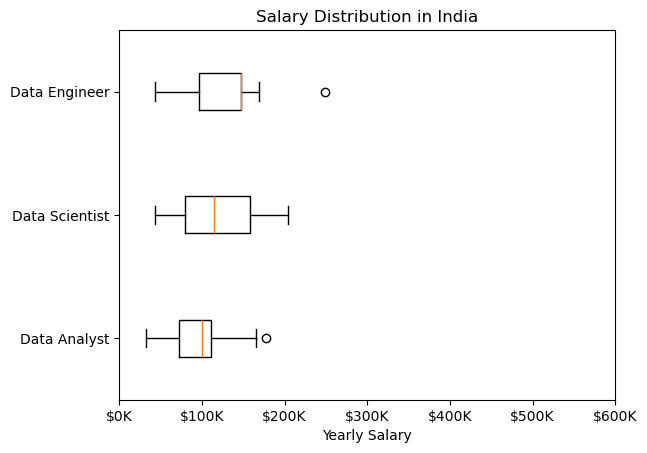

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_india = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

df_india = df_india.dropna(subset=['salary_year_avg'])
job_list = [df_india[df_india['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in India')
plt.xlabel('Yearly Salary')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()


## Notes

### General

* `boxplot()`: plot a box plot
* Common Parameters:
    * `column` - column(s) to plot
    * `by` - if specified, data will be grouped and a box plot for each group will be plotted
    * `vert` - if False, plots horizontal boxplots
* * Syntax: `boxplot(column=['column1', 'column2', ...], by=None, vert=False)`

### General Info

* Purpose:
    * Visualize the distribution of a dataset by displaying the summary statistics (minimum, first quartile, median, third quartile, and maximum).
    * Identify outliers and skewness in the data.
    * Compare distributions across multiple groups.

![Boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)
*Source: https://www.kdnuggets.com/2019/11/understanding-boxplots.html*

* Description: A box plot consists of a box representing the interquartile range (IQR), a line inside the box representing the median, and whiskers extending from the box to the minimum and maximum values within 1.5 times the IQR. Outliers beyond this range are plotted as individual points.
* Interpretation:
    * Box height represents the IQR (middle 50% of data).
    * Median line divides the box into the 25th and 75th percentiles.
    * Whiskers show the range of non-outlier data points.
    * Outliers are plotted as individual points beyond the whiskers.

### Advantages

* Compact visualization of key summary statistics.
* Easy to compare distributions across multiple groups.
* Identifies skewness and outliers in the data.

## Example 1

 Create a box plot to see the distribution of `salary_year_avg` for the DataFrame.

In [ ]:
# Only get data analyst jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

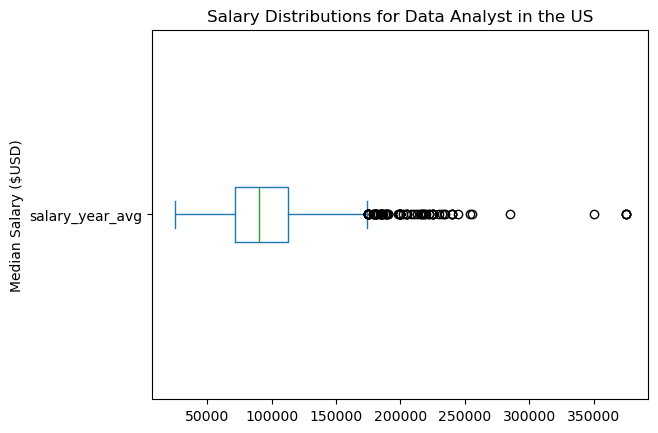

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

### Interpretation

* Median Salary: The green line in the box indicates the median salary, which appears to be around $100,000.
* Interquartile Range (IQR): The box itself spans from approximately $65,000 (lower quartile) to $125,000 (upper quartile). This range represents the middle 50% of the salary data.
* Whiskers: The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends to about $50,000, indicating the minimum typical salary. The upper whisker goes up to about $175,000, suggesting the maximum typical salary before considering outliers.
* Outliers: Salaries represented by dots above the upper whisker are considered outliers. There are several outliers ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution.

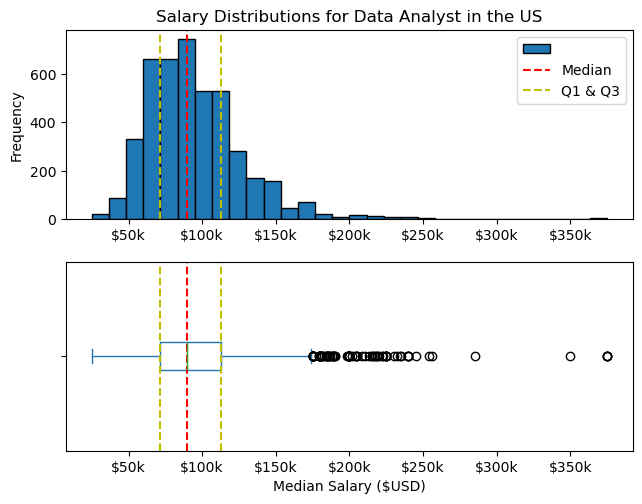

In [ ]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

## Example 2

We'll create 3 boxplots for Data Analyst, Data Engineer, and Data Scientist job salaries in the United States.

First let's create a DataFrame with only these 3 job_titles and only salary data.

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

Next, let's plot it. In our `job_list` we're first filtering to make sure the `job_title_short` is in (`==`) `job_title`. Then we're selecting the `salary_year_avg` column for each `job_title` in our `job_titles` list.

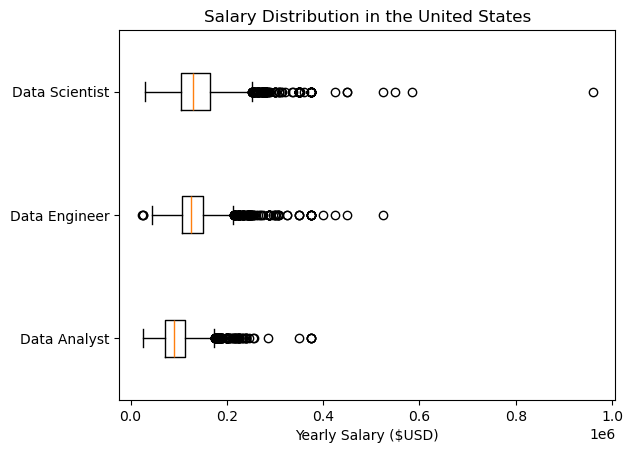

In [ ]:
# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

### Interpretation

* Individually
    * Data Analyst Salaries: The median salary for data analysts is around $100,000, with the interquartile range (IQR) between approximately $65,000 and $125,000. Several outliers are observed, indicating salaries as high as $350,000.
    * Data Engineer Salaries: Data engineers have a median salary near $200,000. The IQR extends from about $100,000 to approximately $300,000, and outliers suggest salaries reaching up to $500,000.
    * Data Scientist Salaries: Data scientists show a median salary around $200,000. The IQR is narrower, ranging from roughly $150,000 to $250,000. Outliers extend beyond $800,000, indicating some exceptionally high salaries in this field.
* Comparison Between the Charts
    * Range and Outliers: Data engineers and data scientists tend to have higher salary ranges and more significant outliers compared to data analysts. This suggests that roles in engineering and science are potentially more lucrative and vary more in compensation.
    * Median and IQR: The median salaries for data engineers and scientists are higher than for analysts. The spread of salaries (IQR) is also broader for engineers, indicating a wider variance in pay within this role.
    * Overall Trend: The progression from analyst to engineer to scientist shows a trend of increasing salary medians and upper ranges, reflecting higher compensation with increased specialization and skills within the data field.


#### Bonus: Customization

This graph isn't perfect and we can add in some advanced customization to help with readability. Like:
* Formatting y-axis to display in thousands.
* Adding a scale to the y-axis.
* Limiting the y-axis to 600,000 (removes the one outlier for the one Data Scientist role).

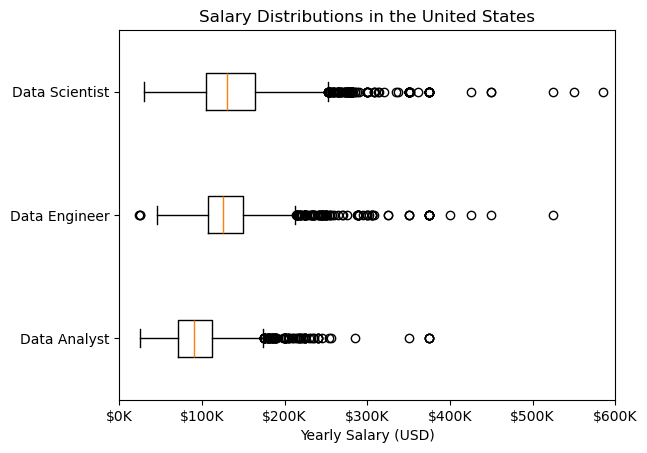

In [ ]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()